In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-02-16,55518,94651,111069,10555,20389,443,2033060,169391,28911,436139,...,4070332,49725,79461,1,133927,2311,169487,2148,70823,35315
2021-02-17,55540,95726,111247,10583,20400,525,2039124,169597,28912,437874,...,4083092,50208,79497,1,134319,2329,170527,2151,71677,35423
2021-02-18,55557,96838,111418,10610,20452,548,2046795,169820,28918,439841,...,4095187,50752,79548,1,134781,2347,171154,2154,72467,35543
2021-02-19,55575,97909,111600,10645,20478,548,2054681,170011,28920,441659,...,4107286,51377,79598,1,135114,2362,171717,2157,73203,35710
2021-02-20,55580,99062,111764,10672,20499,598,2060625,170234,28926,443536,...,4117739,52163,79632,1,135603,2368,172315,2157,73894,35768


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-02-16,4.0,801.0,175.0,17.0,8.0,0.0,4003.0,136.0,6.0,1427.0,...,10636.0,365.0,19.0,0.0,350.0,42.0,1043.0,3.0,575.0,93.0
2021-02-17,22.0,1075.0,178.0,28.0,11.0,82.0,6064.0,206.0,1.0,1735.0,...,12760.0,483.0,36.0,0.0,392.0,18.0,1040.0,3.0,854.0,108.0
2021-02-18,17.0,1112.0,171.0,27.0,52.0,23.0,7671.0,223.0,6.0,1967.0,...,12095.0,544.0,51.0,0.0,462.0,18.0,627.0,3.0,790.0,120.0
2021-02-19,18.0,1071.0,182.0,35.0,26.0,0.0,7886.0,191.0,2.0,1818.0,...,12099.0,625.0,50.0,0.0,333.0,15.0,563.0,3.0,736.0,167.0
2021-02-20,5.0,1153.0,164.0,27.0,21.0,50.0,5944.0,223.0,6.0,1877.0,...,10453.0,786.0,34.0,0.0,489.0,6.0,598.0,0.0,691.0,58.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
US                71510.0
Brazil            54940.0
Italy             14914.0
India             14264.0
Russia            12775.0
Czechia           11364.0
United Kingdom    10453.0
Poland             8509.0
Indonesia          8054.0
Iran               7922.0
Turkey             7857.0
Mexico             7785.0
Peru               7719.0
Germany            7162.0
Ukraine            6473.0
Argentina          5944.0
Colombia           5017.0
Netherlands        4619.0
Chile              3906.0
Iraq               3273.0
Name: 2021-02-20 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

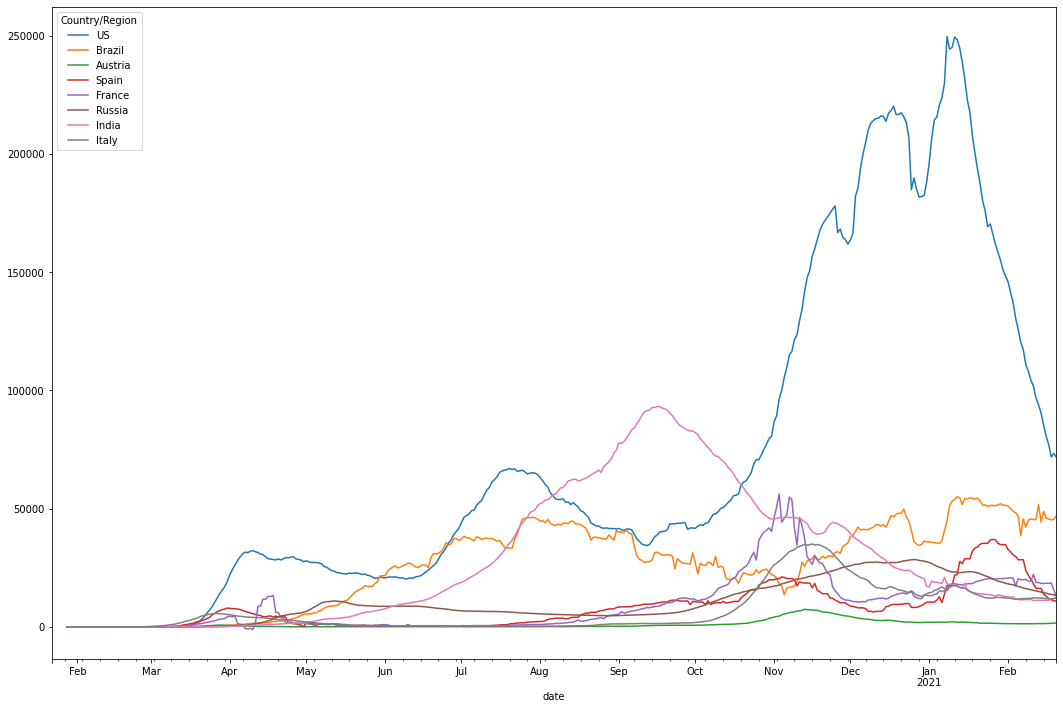

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

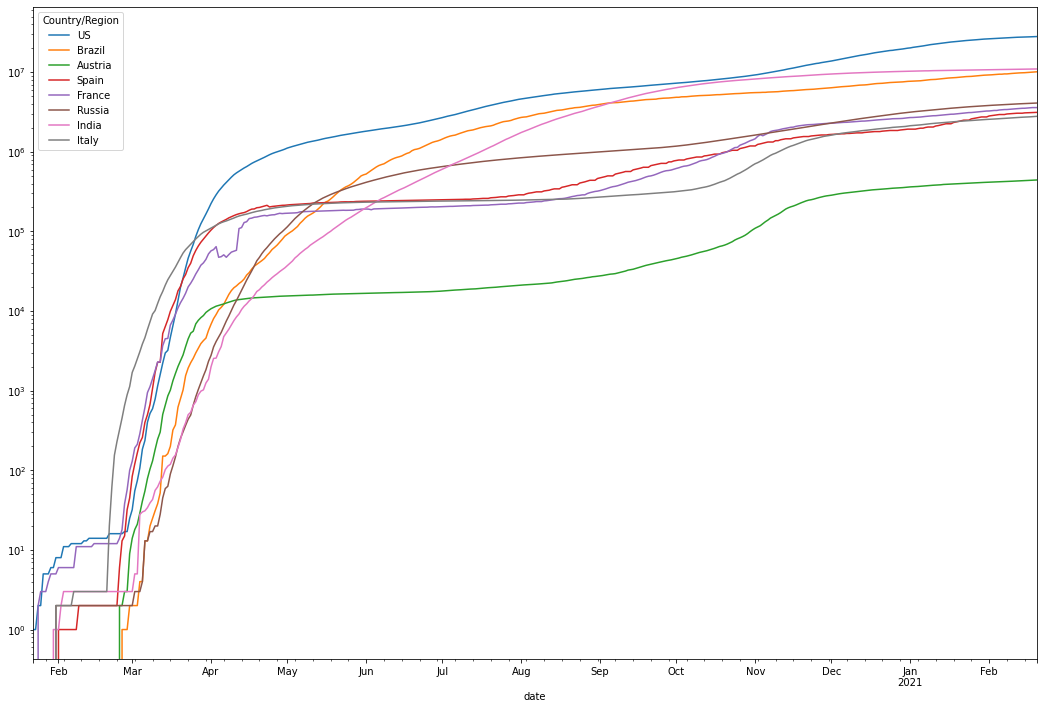

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-02-16,2428,1582,2945,107,494,9,50432,3150,909,8260,...,118421,546,622,0,1292,35,1942,618,974,1414
2021-02-17,2428,1600,2947,107,496,10,50616,3155,909,8290,...,119159,553,622,0,1297,35,1948,618,983,1418
2021-02-18,2430,1617,2950,107,498,10,50857,3156,909,8312,...,119614,558,622,0,1303,35,1956,618,991,1420
2021-02-19,2430,1636,2954,107,498,10,51000,3158,909,8348,...,120147,563,622,0,1308,35,1961,618,1002,1430
2021-02-20,2430,1653,2958,107,498,11,51122,3159,909,8368,...,120593,569,622,0,1312,35,1971,618,1016,1432


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                1844.0
Brazil            1240.0
Mexico             832.0
Russia             469.0
United Kingdom     446.0
Poland             254.0
Italy              251.0
Philippines        239.0
Peru               201.0
Czechia            184.0
Colombia           174.0
Indonesia          164.0
Germany            142.0
Argentina          122.0
Hungary            107.0
Name: 2021-02-20 00:00:00, dtype: float64

#### Countries with the biggest numbers of deaths

In [10]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                497648
Brazil            245977
Mexico            179797
India             156302
United Kingdom    120593
Italy              95486
France             83546
Russia             81517
Germany            67883
Spain              67101
Iran               59409
Colombia           58685
Argentina          51122
South Africa       48940
Peru               44690
Name: 2021-02-20 00:00:00, dtype: int64

In [11]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-02-16,1756.0,1167.0,39.0,530.0,587.0,449.0,100.0,336.0
2021-02-17,2459.0,1150.0,30.0,337.0,310.0,459.0,101.0,369.0
2021-02-18,2558.0,1367.0,22.0,388.0,271.0,469.0,97.0,347.0
2021-02-19,2706.0,1280.0,36.0,397.0,1.0,461.0,101.0,348.0
2021-02-20,1844.0,1240.0,20.0,0.0,3.0,469.0,90.0,251.0


### New Deaths (moving average, 7 days)

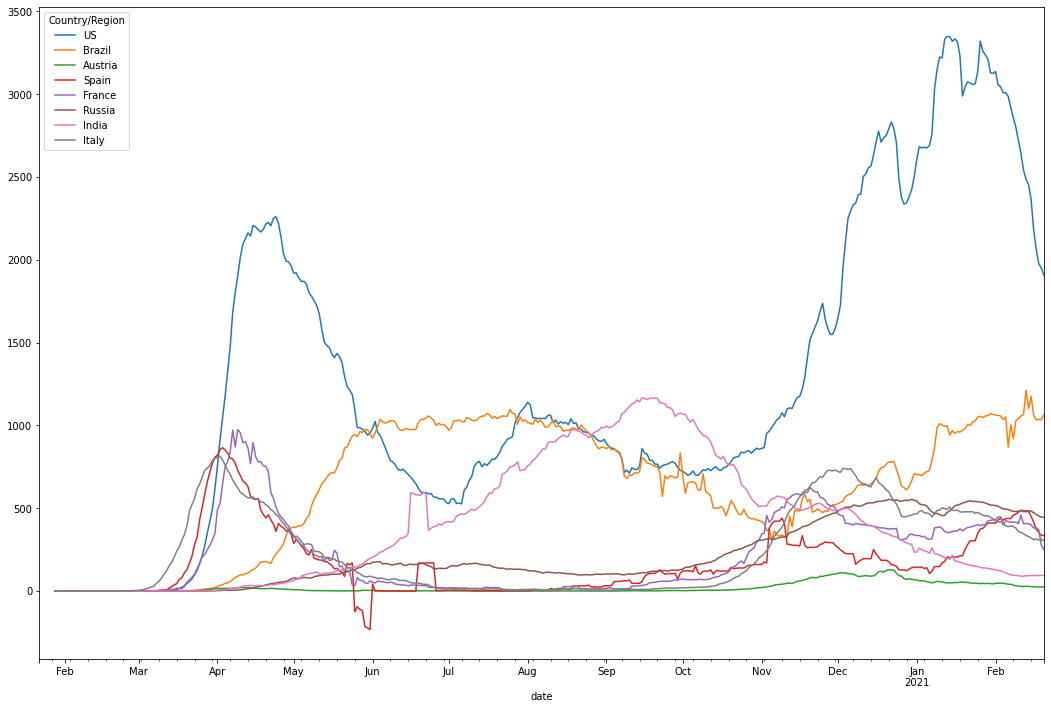

In [12]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

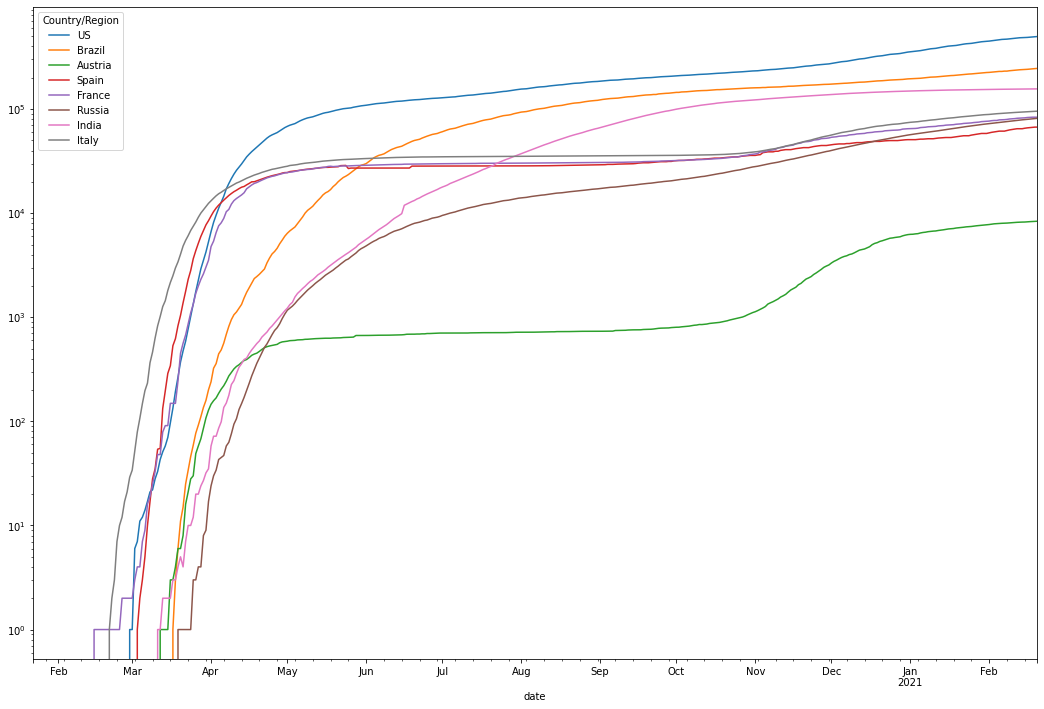

In [13]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [14]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[df_daily_recovered >= 0][countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-02-16,0.0,25377.0,1451.0,0.0,1710.0,17288.0,11833.0,14444.0
2021-02-17,0.0,86138.0,1313.0,0.0,1500.0,17686.0,11987.0,16519.0
2021-02-18,0.0,27353.0,1210.0,0.0,1390.0,18388.0,10896.0,17771.0
2021-02-19,0.0,27863.0,1223.0,0.0,0.0,18460.0,10307.0,17175.0
2021-02-20,0.0,81887.0,1629.0,0.0,0.0,17303.0,11667.0,12488.0


### New Recovered (moving average, 7 days)

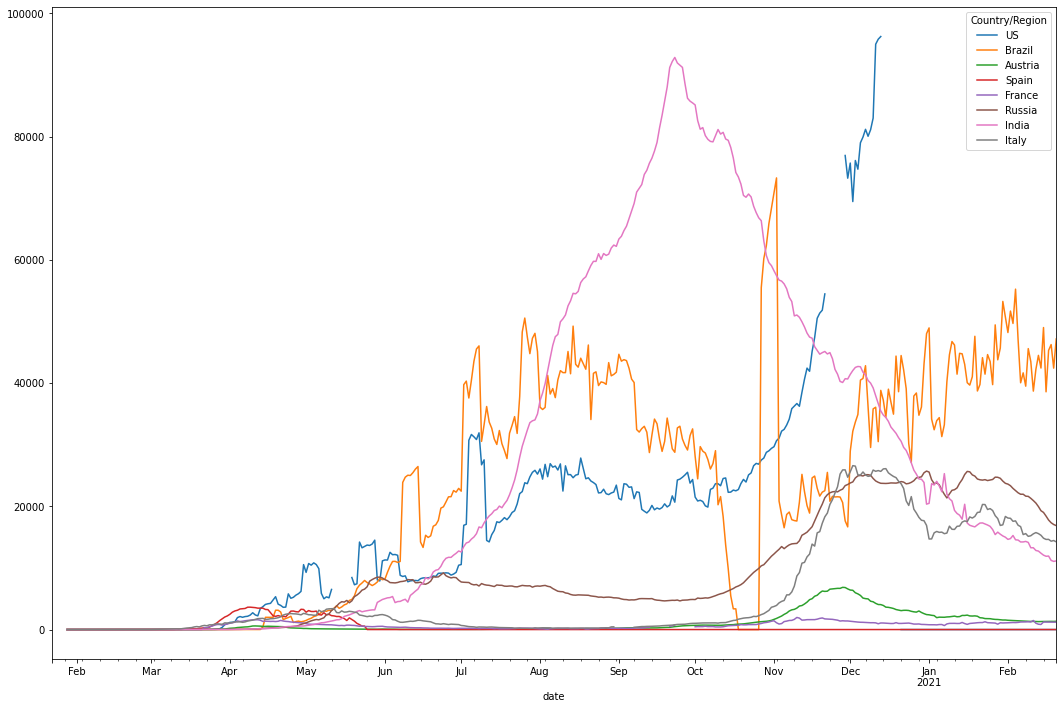

In [16]:
df_daily_recovered[df_daily_recovered >= 0][countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [17]:
df_recovered.loc["2020-02-23","Italy"] = 1

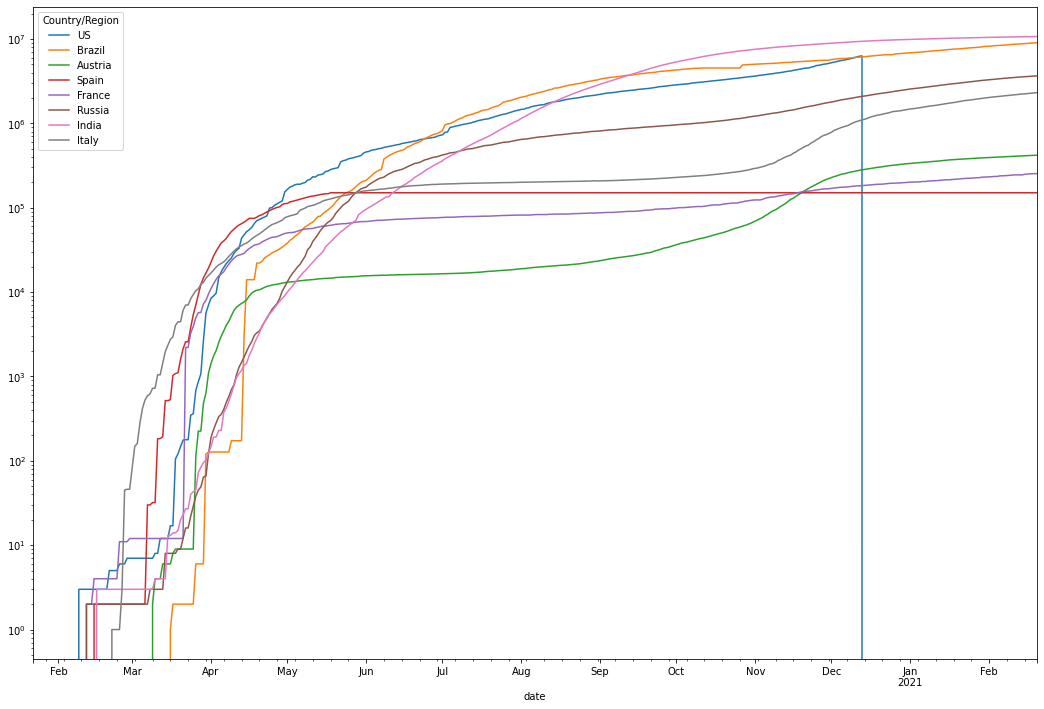

In [18]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [19]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [20]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [21]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [22]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [23]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [24]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [25]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [26]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [27]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [28]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [29]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [30]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [31]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

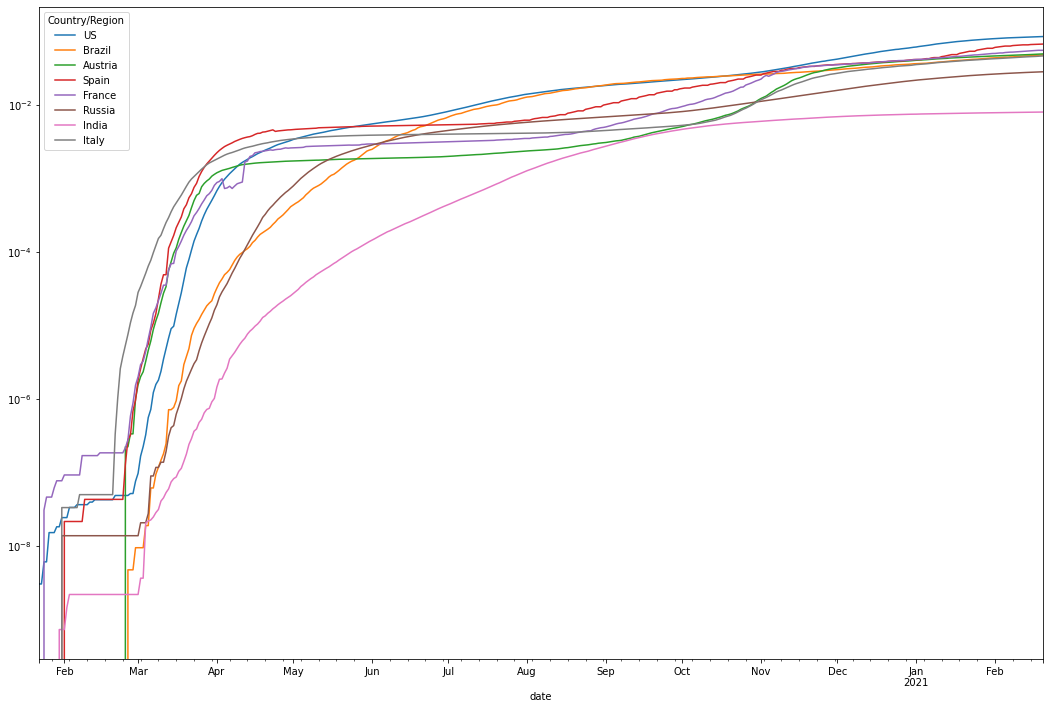

In [32]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

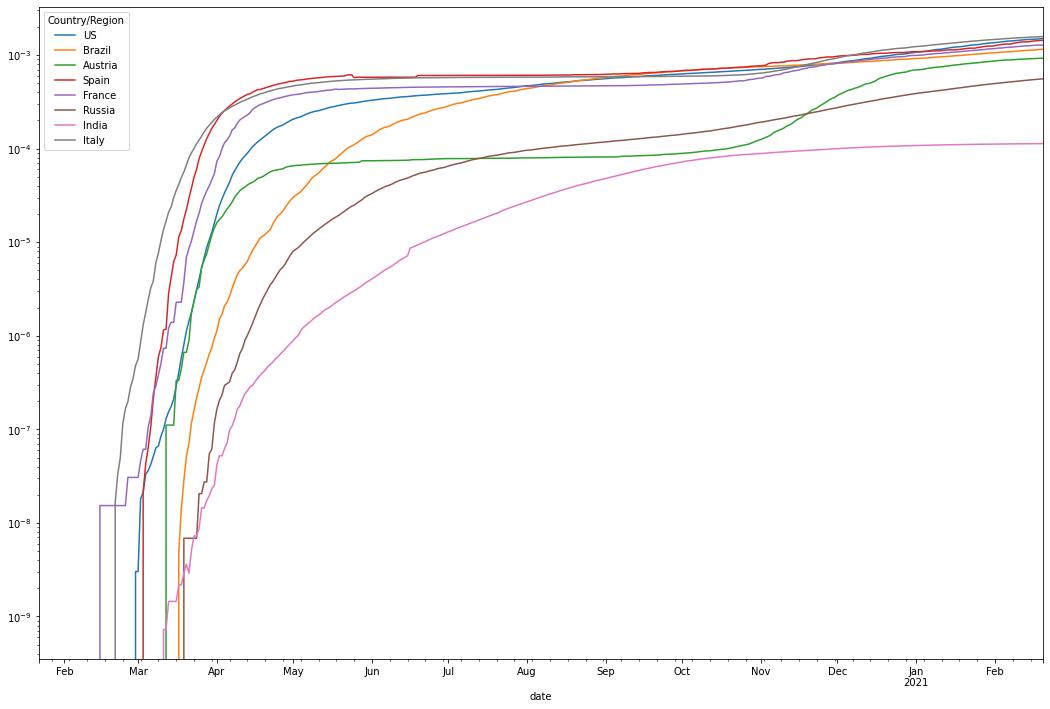

In [33]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

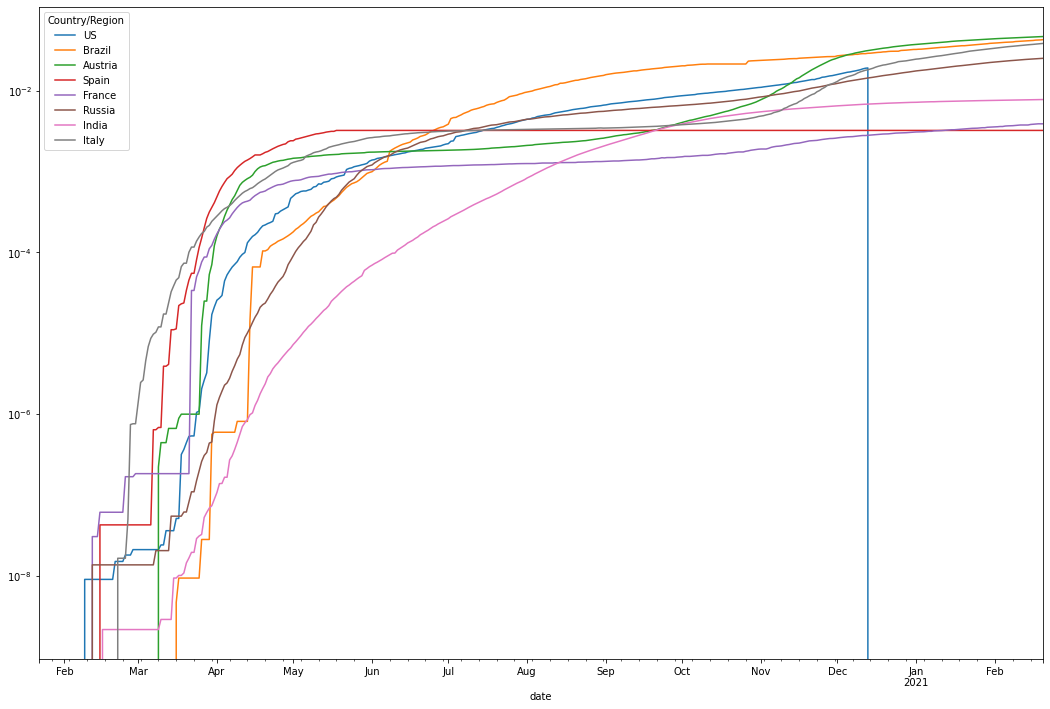

In [34]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

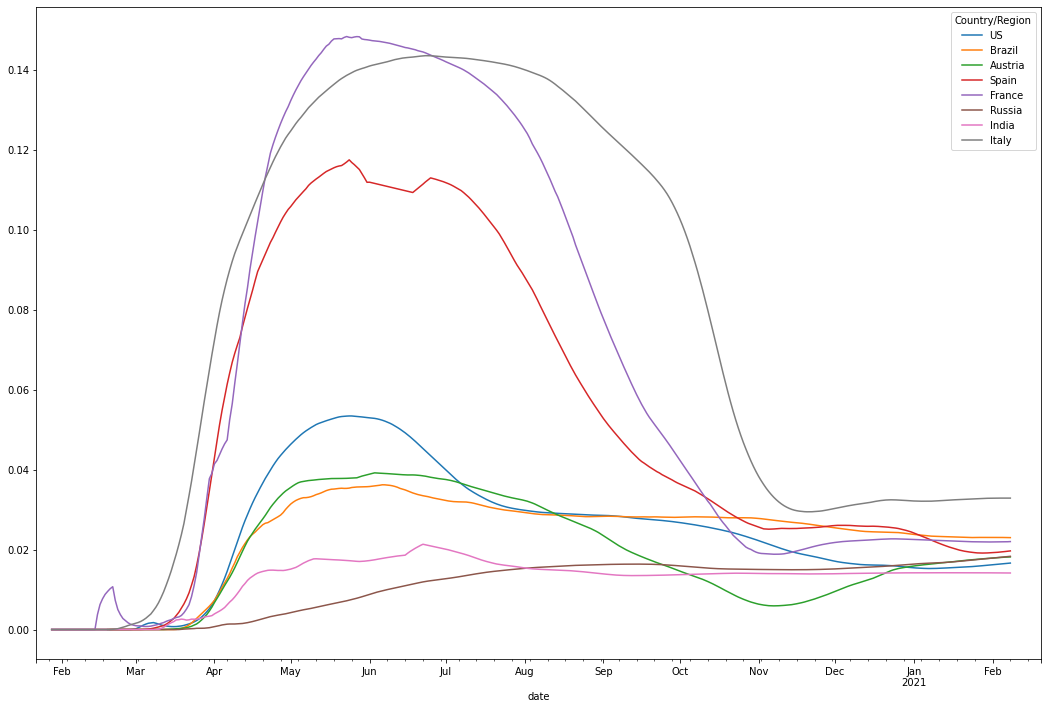

In [35]:
ratio = df_deaths/df_cases.shift(-12)
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()